In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotnine import *

In [2]:
save_df = False
save_plot = False

# Clean Data

In [5]:
df = pd.read_excel('data_formatted/lag_entropy.xlsx') # from matlab
df['group'] = df['unique_id'].apply(lambda x: 'OA' if 'cecon' in x else 'PD')

In [6]:
lower_body_cols = ['hip','knee']
df = df[[col for col in df.columns if 'elbow' not in col]]

In [7]:
# Separate entropies
ent_dfs = {}
ent_graph = {}
for prefix in ['sam','ap']:
    ent_df = df[['unique_id','group','dance_group'] + [col for col in df.columns if f"{prefix}-" in col]]
    ent_df_melt = ent_df.melt(id_vars = ['unique_id','group','dance_group'])
    ent_df_melt.columns = ['unique_id','group','dance_group','measure',f'{prefix}en']
    
    ent_dfs[f'{prefix}en'] = ent_df
    ent_graph[f'{prefix}en'] = ent_df_melt

In [8]:
def pub_theme(text_size):
    '''
    Ggplot theme to make graph ready for publishing.
    '''
    item = theme(
        # text settings
        text = element_text(size = text_size, ha='center',family='sans'),
        # plot_title = element_text(hjust = 0.5),
        # background color
        panel_background = element_rect(fill = 'white'),
        # border color
        panel_border = element_blank(),
        # axis settings
        axis_line = element_line(),
        axis_text_x = element_text(size = text_size*0.8, ha='center',family='sans'),
        axis_text_y = element_text(size = text_size*0.8, ha='right', family='sans'),
        # get rid of axis
        panel_grid_major_x = element_blank(),
        panel_grid_major_y = element_blank(),
        panel_grid_minor_x = element_blank(),
        panel_grid_minor_y = element_blank(),
        # legend settings
        legend_background = element_blank()
    )
    return item

In [9]:
samen_melt = ent_graph['samen']
apen_melt = ent_graph['apen']

In [10]:
def format_measure(dataframe):
    'formats df. Written to prevent repetitive code'
    dataframe['limb'] = dataframe['measure'].str.extract('[a-z]\w+-([a-z]\w+)_')
    dataframe['movement'] = dataframe['measure'].str.extract('[a-z]\w+-[a-z]\w+-(\w+)_')
    dataframe['limb_move'] = dataframe['limb'] + '_' + dataframe['movement']
    dataframe['side'] = dataframe['measure'].apply(lambda x: 'left' if 'lt-' in x else 'right')
    dataframe['side_limb_move'] = dataframe['side'] + '_' + dataframe['limb'] + '_' + dataframe['movement']
    return dataframe

In [11]:
samen_melt = format_measure(samen_melt)
apen_melt = format_measure(apen_melt)

In [12]:
if save_df:
    apen_melt.to_csv('apen.csv', index=False)
    samen_melt.to_csv('samen.csv', index=False)

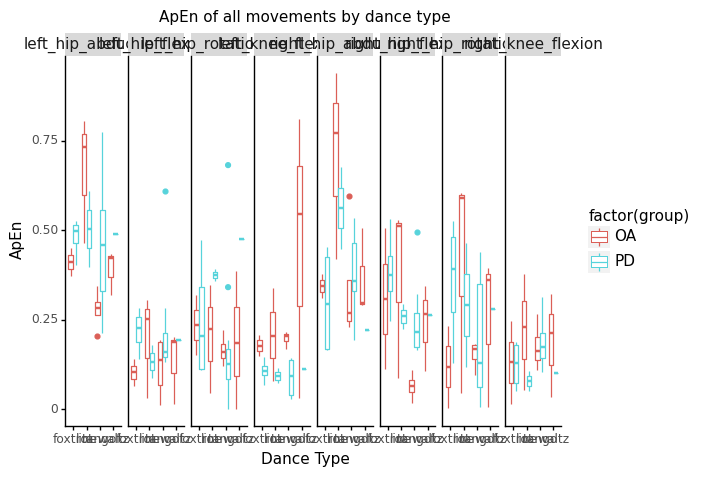

<ggplot: (8778375676314)>

In [13]:
p = (
    ggplot(apen_melt, aes(x='dance_group', y='apen', color='factor(group)')) +
        facet_grid('~side_limb_move') +
        geom_boxplot() +
        pub_theme(11) +
        ggtitle('ApEn of all movements by dance type') +
        xlab("Dance Type") +
        ylab("ApEn")
)
p

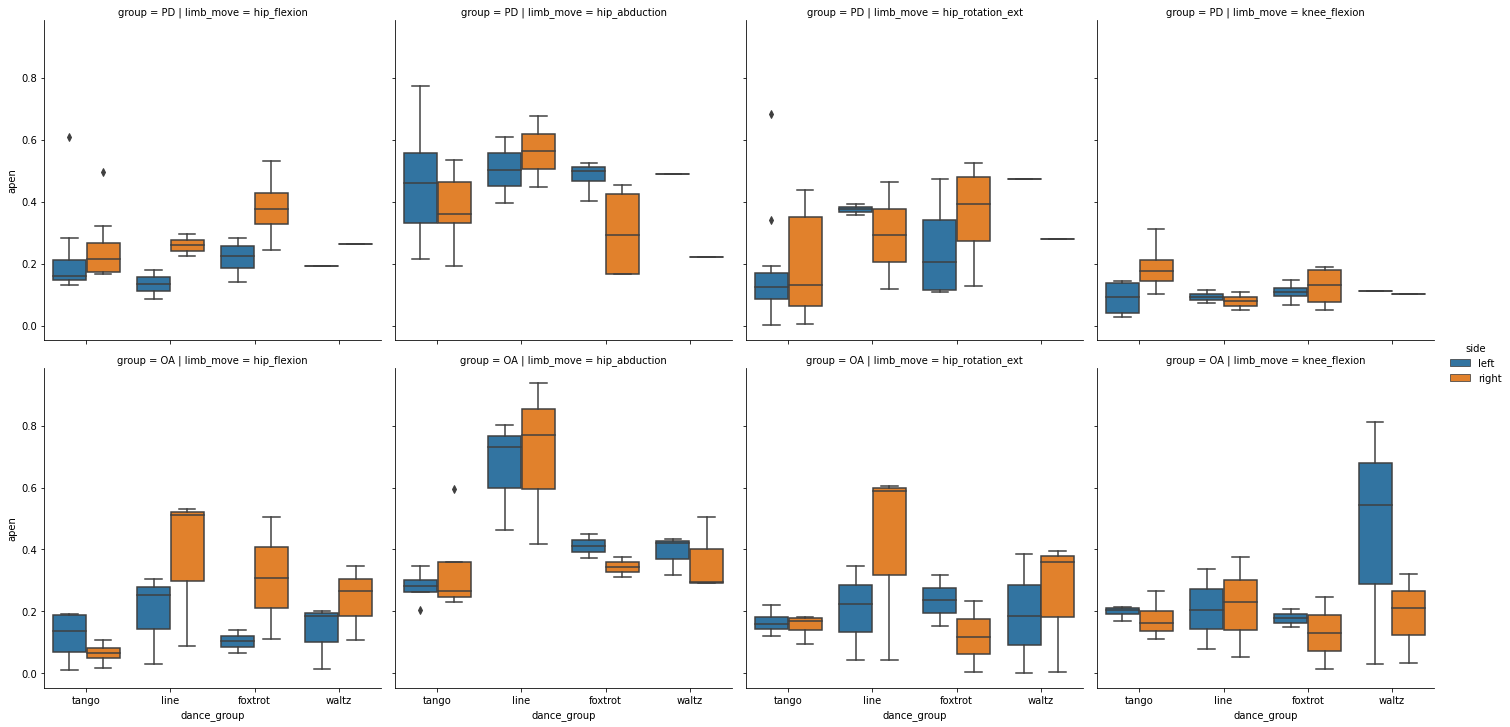

In [14]:
sns.catplot(x='dance_group',y='apen',hue='side',data=apen_melt, 
            col='limb_move',row='group',kind='box')

# Left vs Right

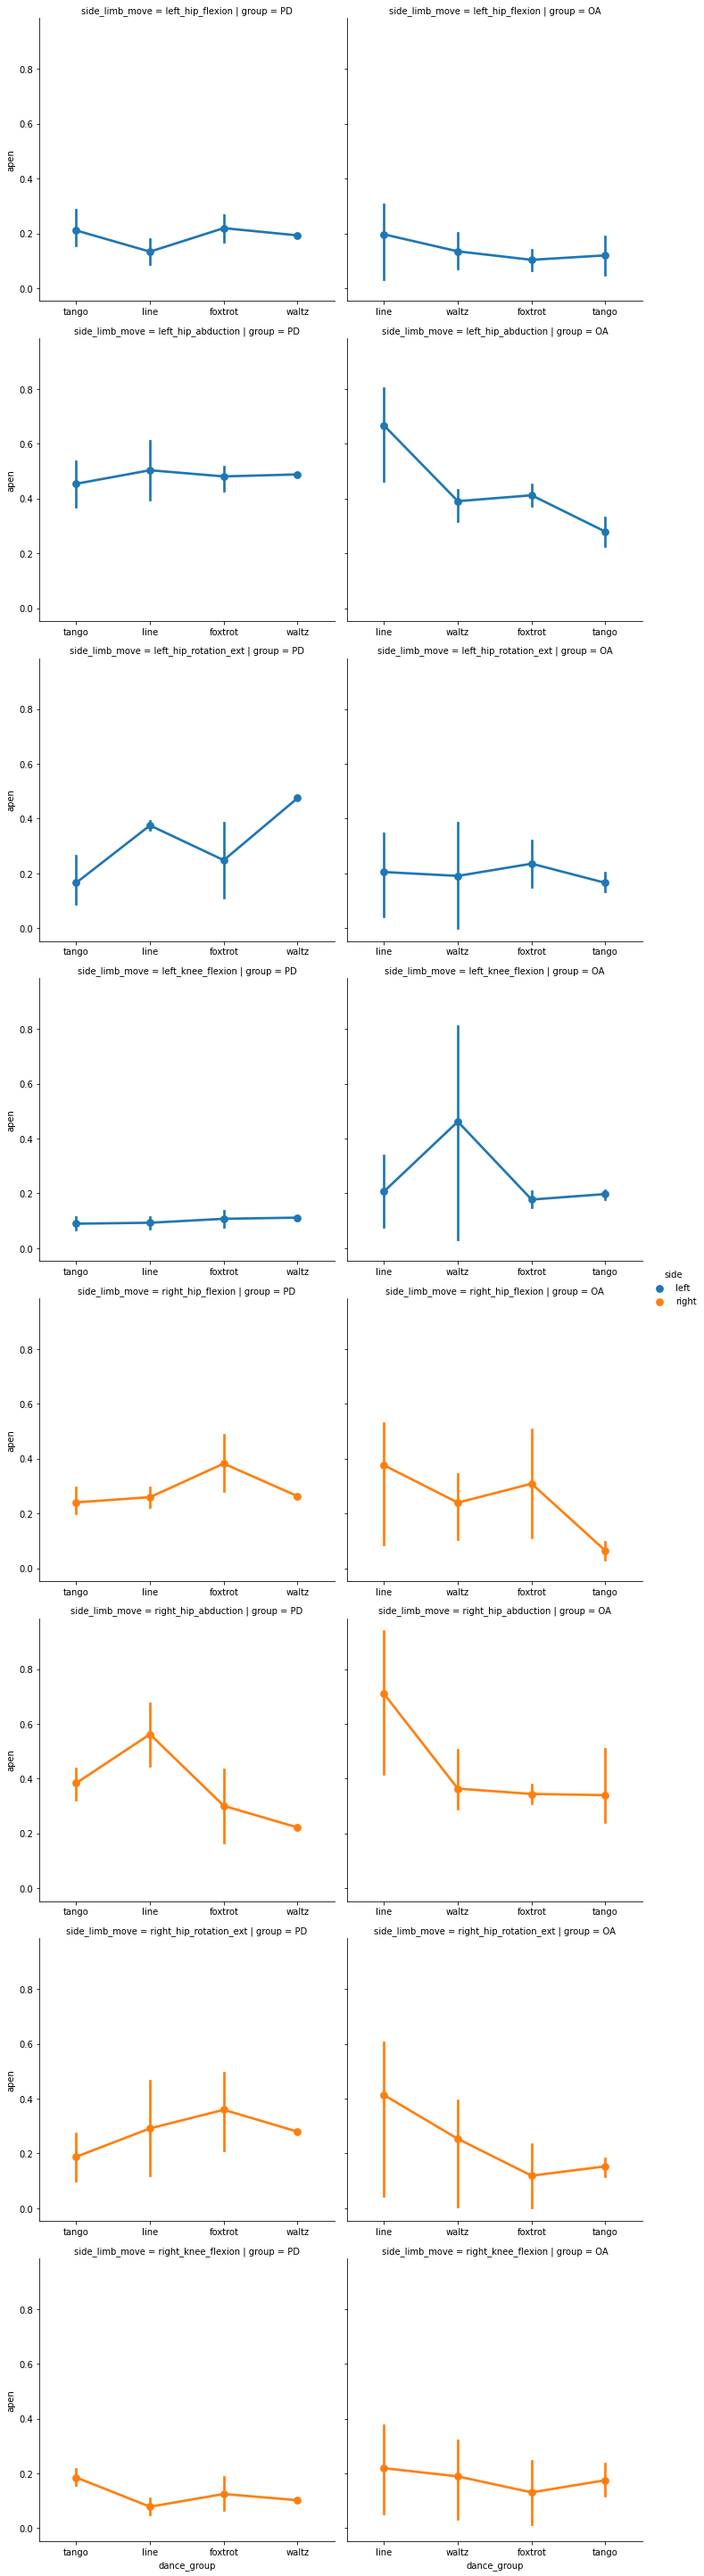

In [15]:
sns.catplot(x='dance_group',y='apen',data=apen_melt,hue='side',col='group',row='side_limb_move', kind='point',sharex=False)

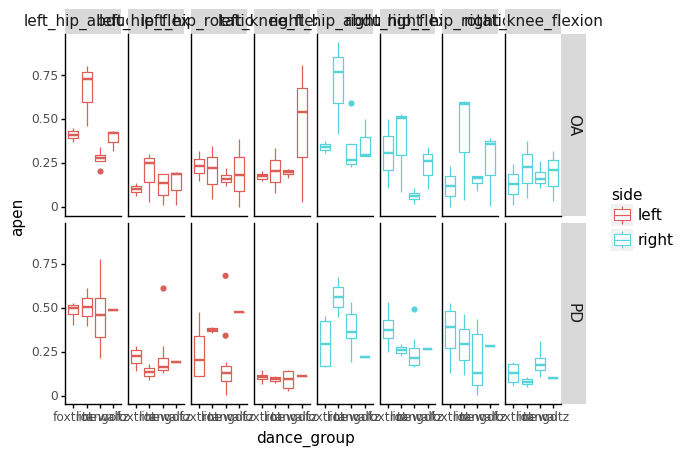

<ggplot: (8778375675389)>

In [16]:
p = (
    ggplot(apen_melt, aes(x='dance_group',y='apen',color='side')) +
    facet_grid('group~side_limb_move') +
    geom_boxplot() +
    pub_theme(11)
)
p

In [17]:
apen_melt

,unique_id,group,dance_group,measure,apen,limb,movement,limb_move,side,side_limb_move
0,pddance001_record01,PD,tango,ap-hip_lt-flexion_(deg),0.281954,hip,flexion,hip_flexion,left,left_hip_flexion
1,pddance001_record02,PD,tango,ap-hip_lt-flexion_(deg),0.176331,hip,flexion,hip_flexion,left,left_hip_flexion
2,pddance002_record02,PD,line,ap-hip_lt-flexion_(deg),0.086862,hip,flexion,hip_flexion,left,left_hip_flexion
3,pddance002_record03,PD,foxtrot,ap-hip_lt-flexion_(deg),0.141337,hip,flexion,hip_flexion,left,left_hip_flexion
4,pddance002_record04,PD,foxtrot,ap-hip_lt-flexion_(deg),0.202389,hip,flexion,hip_flexion,left,left_hip_flexion
...,...,...,...,...,...,...,...,...,...,...
251,pddancecon004_record01,OA,tango,ap-knee_rt-flexion_(deg),0.109824,knee,flexion,knee_flexion,right,right_knee_flexion
252,pddancecon004_record02,OA,tango,ap-knee_rt-flexion_(deg),0.145125,knee,flexion,knee_flexion,right,right_knee_flexion
253,pddancecon004_record03,OA,tango,ap-knee_rt-flexion_(deg),0.180907,knee,flexion,knee_flexion,right,right_knee_flexion
254,pddancecon005_record01,OA,line,ap-knee_rt-flexion_(deg),0.376388,knee,flexion,knee_flexion,right,right_knee_flexion


## t-test

__Hypothesis:__ There is a significant difference in left and right entropies of movements in PD but not OA

In [18]:
apen_melt.head()

,unique_id,group,dance_group,measure,apen,limb,movement,limb_move,side,side_limb_move
0,pddance001_record01,PD,tango,ap-hip_lt-flexion_(deg),0.281954,hip,flexion,hip_flexion,left,left_hip_flexion
1,pddance001_record02,PD,tango,ap-hip_lt-flexion_(deg),0.176331,hip,flexion,hip_flexion,left,left_hip_flexion
2,pddance002_record02,PD,line,ap-hip_lt-flexion_(deg),0.086862,hip,flexion,hip_flexion,left,left_hip_flexion
3,pddance002_record03,PD,foxtrot,ap-hip_lt-flexion_(deg),0.141337,hip,flexion,hip_flexion,left,left_hip_flexion
4,pddance002_record04,PD,foxtrot,ap-hip_lt-flexion_(deg),0.202389,hip,flexion,hip_flexion,left,left_hip_flexion


In [19]:
import researchpy as rp

In [20]:
help(rp.ttest)

Help on function ttest in module researchpy.ttest:

ttest(group1, group2, group1_name=None, group2_name=None, equal_variances=True, paired=False, correction=None)



In [21]:
def sig_left_right(dataframe, group, entropy = 'apen'):
    '''
    Returns a df of significance for left vs right sides of the body
    
    input
    -----
    dataframe: melted dataframe with 'side_limb_move', 'group', and 'apen'|'samen' columns
    group: PD or OA
    entropy: samen or apen
    '''
    import researchpy as rp
    lr = dataframe[dataframe['side']=='left']
    lr['right'] = dataframe[dataframe['side']=='right'][entropy].reset_index(drop=True)
    lr = lr.rename({entropy:'left'},axis=1)
    
    t = pd.DataFrame()
    means = pd.DataFrame()
    measures = dataframe['side_limb_move'].unique()
    for m in measures:
        if 'right' in m:
            continue # pass right sides, since its the same R v L is the same as L v R
        temp = lr[(lr['side_limb_move'] == m) & (lr['group'] == group)]
        res = rp.ttest(group1=temp['left'], group2=temp['right'])
        res[0]['measure'] = m[5:]
        res[1]['measure'] = m[5:]
        t = t.append(res[1])
        means = means.append(res[0])

    t = t[(t['Independent t-test'].str.contains('t =')) | (t['Independent t-test'].str.contains('test p value'))].reset_index(drop=True)
    
    return t, means

In [22]:
pd_t,pd_means = sig_left_right(apen_melt, group='PD')
oa_t,oa_means = sig_left_right(apen_melt, group='OA')

<ipython-input-21-76683cadc0ab>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
oa_t

,Independent t-test,results,measure
0,t =,-1.3752,hip_flexion
1,Two side test p value =,0.1829,hip_flexion
2,t =,-0.1544,hip_abduction
3,Two side test p value =,0.8787,hip_abduction
4,t =,-0.6385,hip_rotation_ext
5,Two side test p value =,0.5297,hip_rotation_ext
6,t =,1.1413,knee_flexion
7,Two side test p value =,0.2660,knee_flexion


In [25]:
pd_t['group'] = 'pd'
oa_t['group'] = 'oa'

results = pd.concat([pd_t, oa_t]).reset_index(drop=True)
results

,Independent t-test,results,measure,group
0,t =,-2.0099,hip_flexion,pd
1,Two side test p value =,0.0516,hip_flexion,pd
2,t =,2.1038,hip_abduction,pd
3,Two side test p value =,0.0421,hip_abduction,pd
4,t =,-0.3311,hip_rotation_ext,pd
5,Two side test p value =,0.7424,hip_rotation_ext,pd
6,t =,-3.6823,knee_flexion,pd
7,Two side test p value =,0.0007,knee_flexion,pd
8,t =,-1.3752,hip_flexion,oa
9,Two side test p value =,0.1829,hip_flexion,oa


__Results:__ 

|left vs right| PD | OA |
|--|--| -- |
|hip_flexion|0.051 |0.183|
|hip_abduction|0.042 |0.879|
|hip_rotation|0.742 |0.530|
|knee_flexion|0.0007 |0.266|

* Sig diff in left vs right entropy of hip_flexion, hip abduction, knee flexion in PD but not in OA

## Illustrate

In [26]:
apen_melt['limb_move'] = apen_melt['limb_move'].str.title().str.replace('_',' ')
apen_melt = apen_melt.rename({'side':'Side'}, axis=1)

In [27]:
apen_melt['Side'] = apen_melt['Side'].str.title()

In [28]:
pd_melt = apen_melt[apen_melt['group']=='PD']
oa_melt = apen_melt[apen_melt['group']=='OA']
pd_melt.head()

,unique_id,group,dance_group,measure,apen,limb,movement,limb_move,Side,side_limb_move
0,pddance001_record01,PD,tango,ap-hip_lt-flexion_(deg),0.281954,hip,flexion,Hip Flexion,Left,left_hip_flexion
1,pddance001_record02,PD,tango,ap-hip_lt-flexion_(deg),0.176331,hip,flexion,Hip Flexion,Left,left_hip_flexion
2,pddance002_record02,PD,line,ap-hip_lt-flexion_(deg),0.086862,hip,flexion,Hip Flexion,Left,left_hip_flexion
3,pddance002_record03,PD,foxtrot,ap-hip_lt-flexion_(deg),0.141337,hip,flexion,Hip Flexion,Left,left_hip_flexion
4,pddance002_record04,PD,foxtrot,ap-hip_lt-flexion_(deg),0.202389,hip,flexion,Hip Flexion,Left,left_hip_flexion


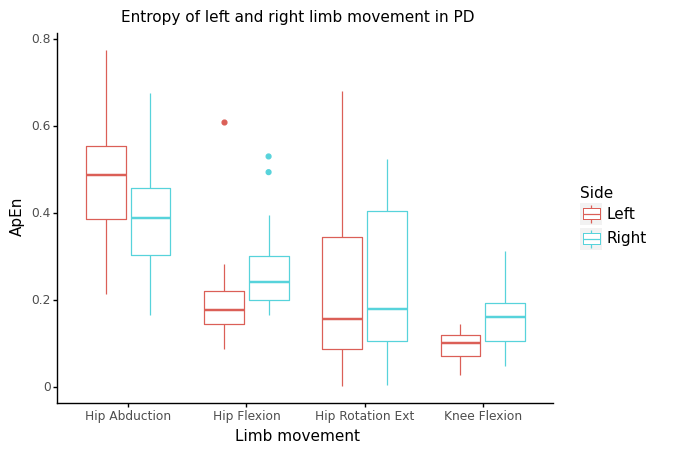

<ggplot: (8778362356032)>

In [29]:
p = (
    ggplot(pd_melt, aes(x='limb_move', y= 'apen', color='Side')) +
    geom_boxplot() +
    ggtitle("Entropy of left and right limb movement in PD") +
    xlab("Limb movement") +
    ylab("ApEn") +
    pub_theme(11) 
)
p

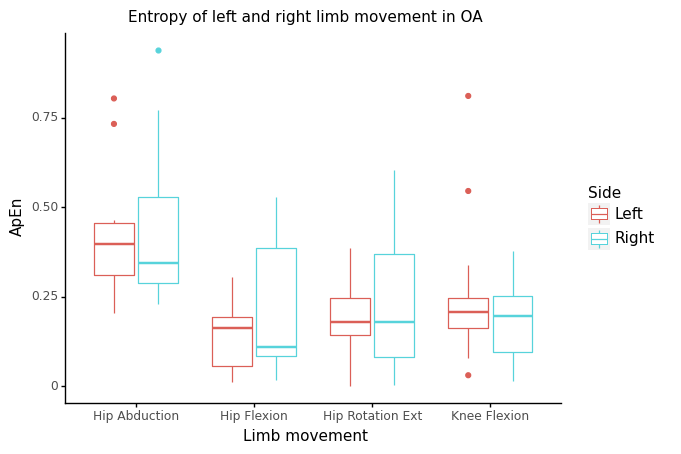

<ggplot: (8778362286162)>

In [30]:
o = (
    ggplot(oa_melt, aes(x='limb_move', y= 'apen', color='Side')) +
    geom_boxplot() +
    ggtitle("Entropy of left and right limb movement in OA") +
    xlab("Limb movement") +
    ylab("ApEn") +
    pub_theme(11) 
)
o

# SamEn and ApEn results

In [32]:
import researchpy as rp
import scipy.stats as stats

In [33]:
entropies = samen_melt.copy()
entropies['apen'] = apen_melt['apen']
entropies.head()

,unique_id,group,dance_group,measure,samen,limb,movement,limb_move,side,side_limb_move,apen
0,pddance001_record01,PD,tango,sam-hip_lt-flexion_(deg),0.254866,hip,flexion,hip_flexion,left,left_hip_flexion,0.281954
1,pddance001_record02,PD,tango,sam-hip_lt-flexion_(deg),0.154491,hip,flexion,hip_flexion,left,left_hip_flexion,0.176331
2,pddance002_record02,PD,line,sam-hip_lt-flexion_(deg),0.085696,hip,flexion,hip_flexion,left,left_hip_flexion,0.086862
3,pddance002_record03,PD,foxtrot,sam-hip_lt-flexion_(deg),0.135990,hip,flexion,hip_flexion,left,left_hip_flexion,0.141337
4,pddance002_record04,PD,foxtrot,sam-hip_lt-flexion_(deg),0.188269,hip,flexion,hip_flexion,left,left_hip_flexion,0.202389


In [34]:
res = rp.ttest(group1 = entropies['samen'], group1_name = 'samen',
         group2 = entropies['apen'], group2_name = 'apen')

In [35]:
res[0]

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,samen,256.0,0.223369,0.157170,0.009823,0.204024,0.242713
1,apen,256.0,0.257094,0.178672,0.011167,0.235103,0.279086
2,combined,512.0,0.240231,0.168946,0.007466,0.225563,0.254900


In [36]:
res[1]

,Independent t-test,results
0,Difference (samen - apen) =,-0.0337
1,Degrees of freedom =,510.0000
2,t =,-2.2676
3,Two side test p value =,0.0238
4,Difference < 0 p value =,0.0119
5,Difference > 0 p value =,0.9881
6,Cohen's d =,-0.2004
7,Hedge's g =,-0.2001
8,Glass's delta =,-0.2146
9,Pearson's r =,0.0999


`t = -2.27 p = 0.02 d = -0.20`

ApEn (u=0.26 (0.24, 0.28)) is significantly higher than SamEn (u=0.22 (0.20, 0.24))

In [37]:
stats.ttest_ind(entropies['samen'], entropies['apen'])

Ttest_indResult(statistic=-2.2676365410818904, pvalue=0.023768920392423187)